<a href="https://colab.research.google.com/github/pande17827/FastApi/blob/main/4.Path%20%26%20Query%20Params%20in%20FastAPI/1.path%20parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

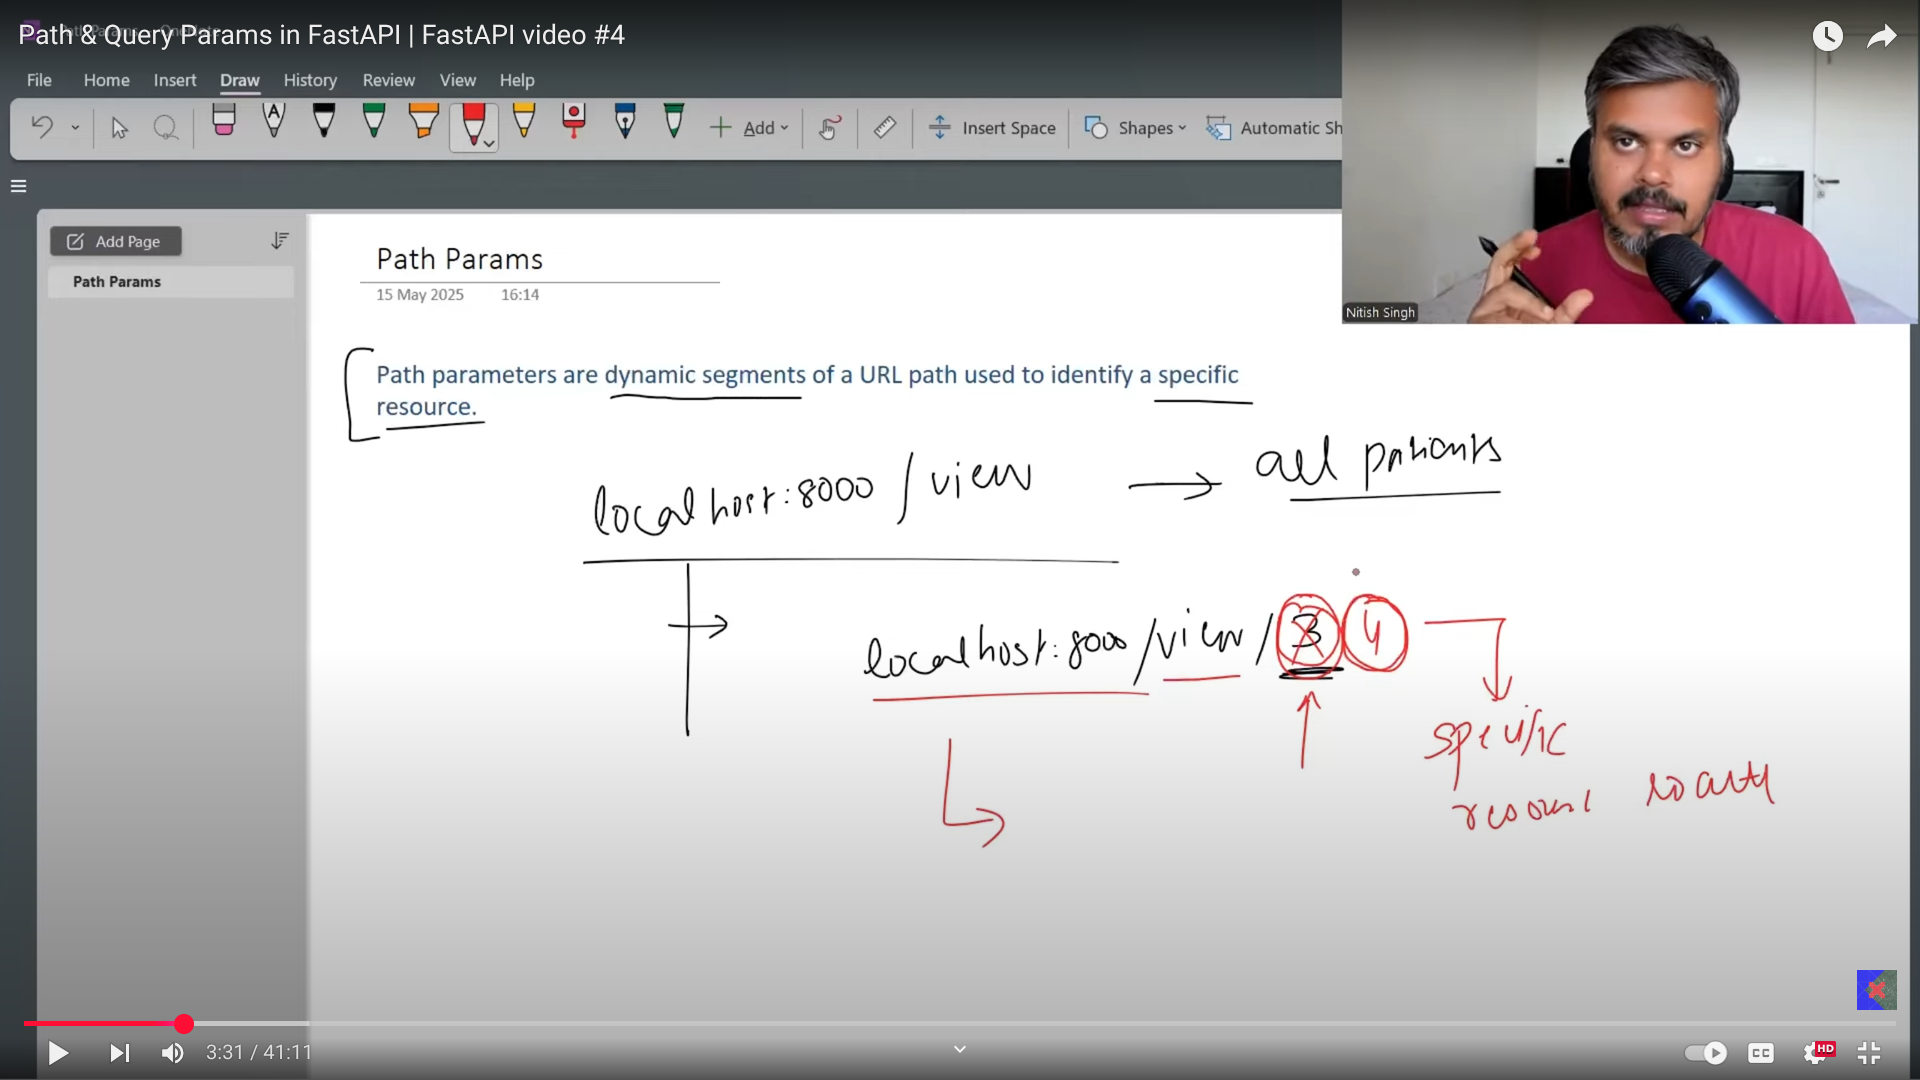

# <b> useful for
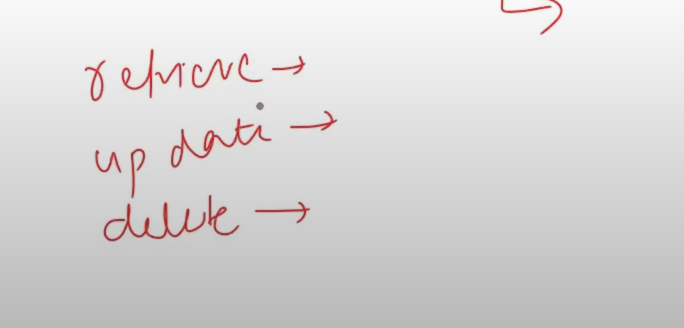

In [ ]:
!pip install fastapi uvicorn pydantic nest-asyncio pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
from time import daylight
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn
import json
from google.colab import userdata



# setting ngrok
ngrok_auth_token = userdata.get('NGROK_AUTHTOKEN')


# running instance of the fast api
app = FastAPI()

# function to load the data from patients.json
def load_data():
  with open('/content/patients.json') as f:
    data = json.load(f)
  return data

# first router for first endpoint
@app.get("/")
def Hello():
  return {"Message":"Patient Management System Api"}

@app.get('/about')
def about():
  return {"message":"A fully functional API tomanage your patients records"}

@app.get('/view') # this will display all the details of the patients
def view():
  data=load_data()
  return data

@app.get('/patient/{patient_id}')
def view_patient(patient_id):
  #loading all the patiennts
  data=load_data()

  if patient_id in data:
    return data[patient_id]
  return {'error':'patient not found'}








# Apply nest_asyncio to allow running uvicorn inside notebook
nest_asyncio.apply()

# Open an ngrok tunnel to the default uvicorn port 8000
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Run the FastAPI app
uvicorn.run(app, host="0.0.0.0", port=8000)


Public URL: NgrokTunnel: "https://39c3-34-73-116-127.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [505]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     150.129.206.170:0 - "GET / HTTP/1.1" 200 OK
INFO:     150.129.206.170:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     150.129.206.170:0 - "GET /patient/P001 HTTP/1.1" 200 OK
INFO:     150.129.206.170:0 - "GET /patient HTTP/1.1" 404 Not Found
INFO:     150.129.206.170:0 - "GET /patient/P001 HTTP/1.1" 200 OK
INFO:     150.129.206.170:0 - "GET /patient/P001/docs HTTP/1.1" 404 Not Found
INFO:     150.129.206.170:0 - "GET /patient/P00/ HTTP/1.1" 307 Temporary Redirect
INFO:     150.129.206.170:0 - "GET /patient/P00 HTTP/1.1" 200 OK
INFO:     150.129.206.170:0 - "GET /patient/P002 HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [505]


# <b><u><i>How to Improving the code readibility

### <b>Method1:- using Path module from FastApi


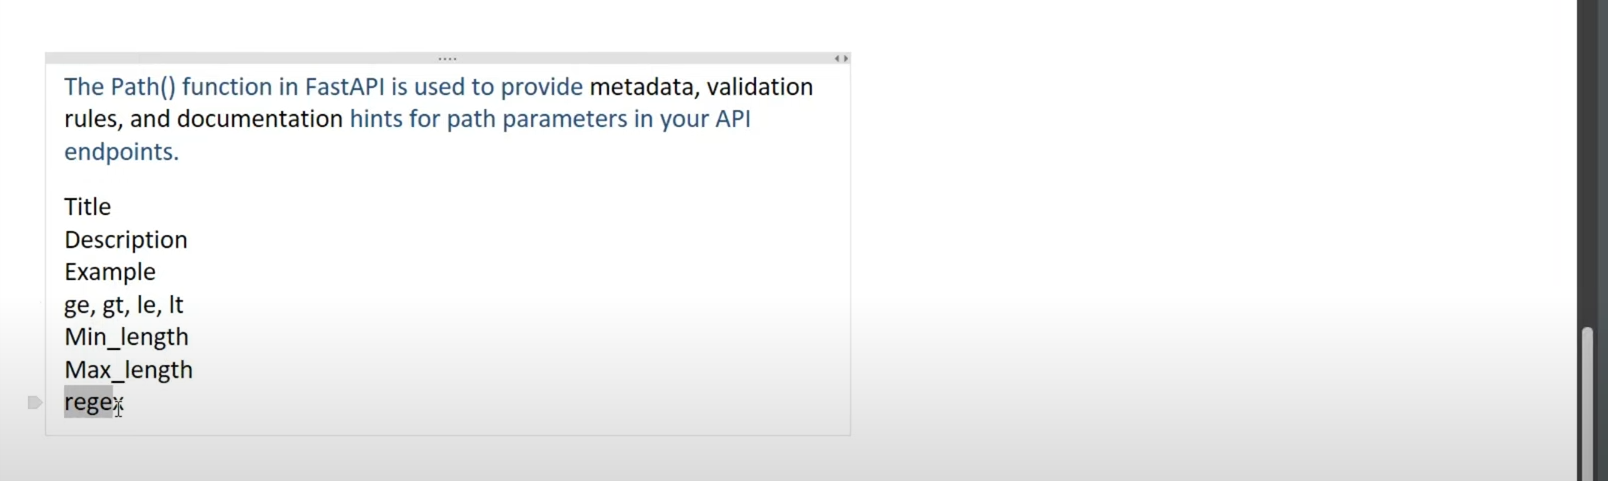

In [9]:
from time import daylight
from fastapi import FastAPI,Path
import nest_asyncio
from pyngrok import ngrok
import uvicorn
import json
from google.colab import userdata



# setting ngrok
ngrok_auth_token = userdata.get('NGROK_AUTHTOKEN')


# running instance of the fast api
app = FastAPI()

# function to load the data from patients.json
def load_data():
  with open('/content/patients.json') as f:
    data = json.load(f)
  return data

# first router for first endpoint
@app.get("/")
def Hello():
  return {"Message":"Patient Management System Api"}

@app.get('/about')
def about():
  return {"message":"A fully functional API tomanage your patients records"}

@app.get('/view') # this will display all the details of the patients
def view():
  data=load_data()
  return data

@app.get('/patient/{patient_id}')
def view_patient(patient_id:str=Path(...,description="ID of the patients in the Database",example="P001,P002,,,,,")):
  #loading all the patiennts
  data=load_data()

  if patient_id in data:
    return data[patient_id]
  return {'error':'patient not found'}








# Apply nest_asyncio to allow running uvicorn inside notebook
nest_asyncio.apply()

# Open an ngrok tunnel to the default uvicorn port 8000
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Run the FastAPI app
uvicorn.run(app, host="0.0.0.0", port=8000)


<ipython-input-9-460bf03aff98>:39: DeprecationWarning: `example` has been deprecated, please use `examples` instead
  def view_patient(patient_id:str=Path(...,description="ID of the patients in the Database",example="P001,P002,,,,,")):


Public URL: NgrokTunnel: "https://2468-34-73-116-127.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [505]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     150.129.206.170:0 - "GET / HTTP/1.1" 200 OK
INFO:     150.129.206.170:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     150.129.206.170:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     150.129.206.170:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     150.129.206.170:0 - "GET /patient/P001 HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [505]


### <b>Method2:-using Status Code

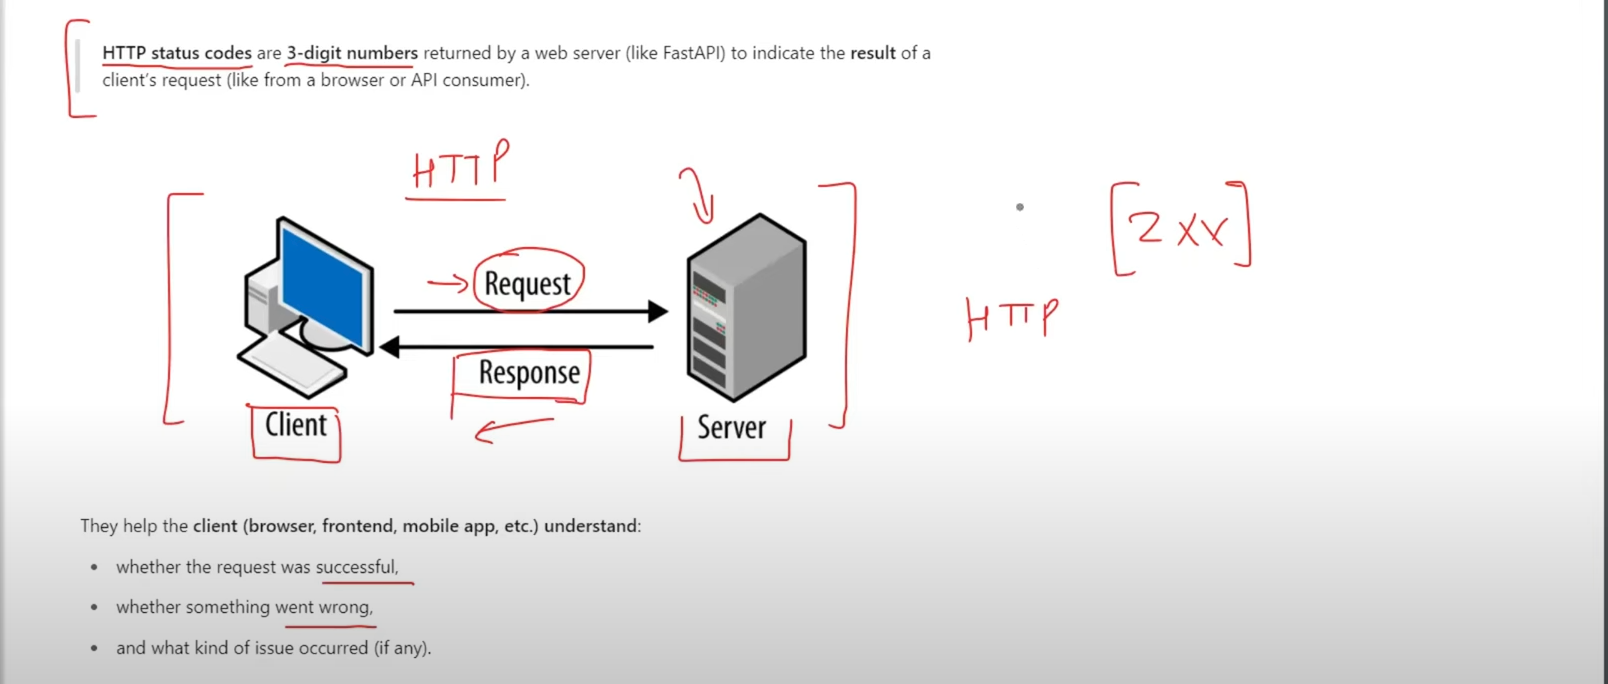
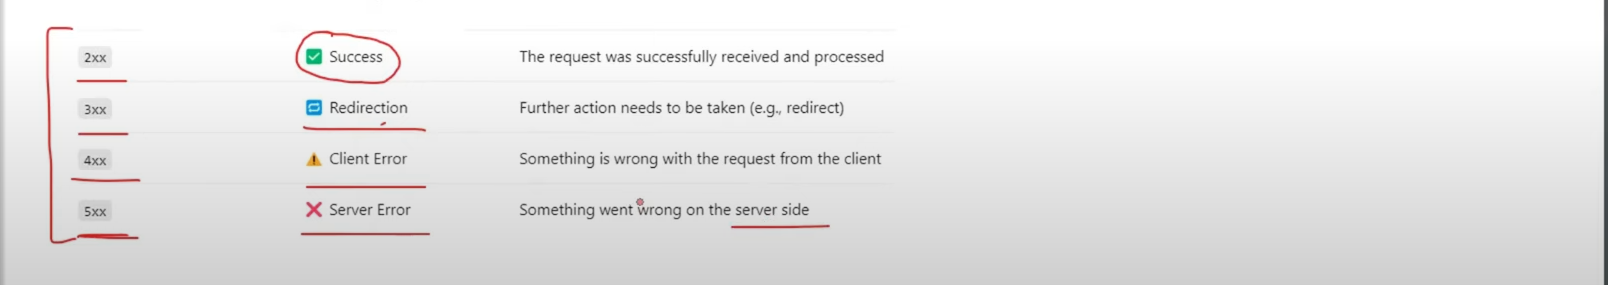
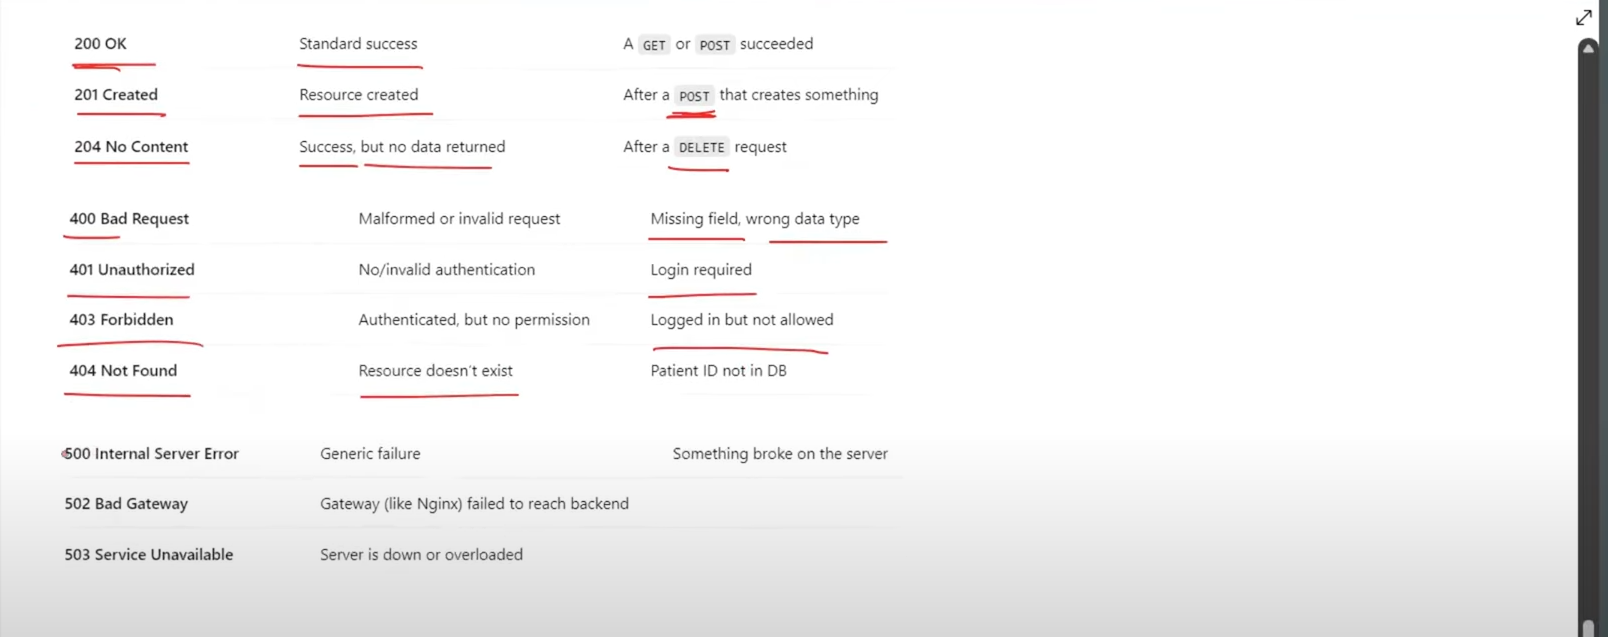

### <b>How to implement Status Code

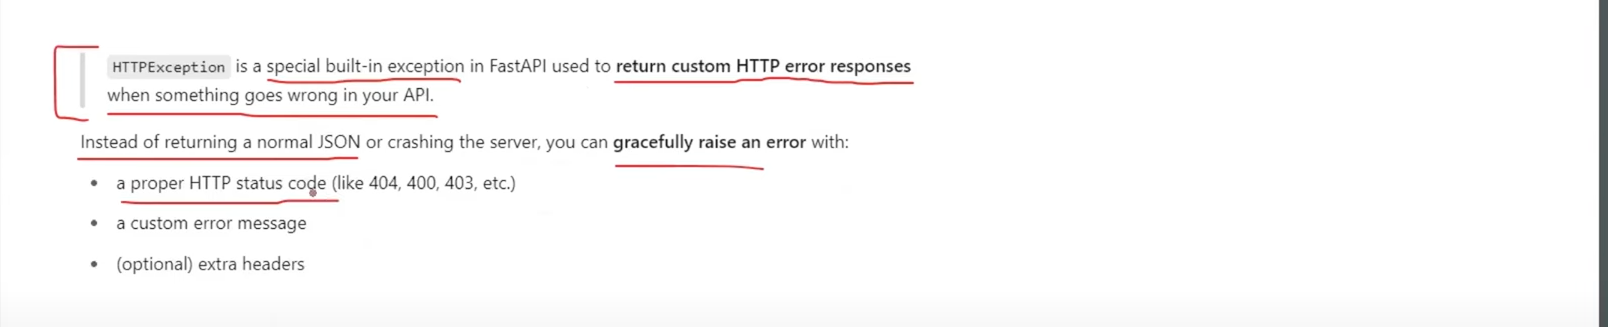